In [2]:
import fiona
import geopandas as gpd

ImportError: cannot import name compat

In [30]:
uri = 's3://naip-analytic/az/2017/60cm/index/naip_3_17_3_1_az.shp'

In [31]:
naip13 = gpd.read_file('/home/ubuntu/naip/2013/naip_3_13_3_1_az.shp')
naip15 = gpd.read_file('/home/ubuntu/naip/2015/naip_3_15_1_1_az.shp')
naip17 = gpd.read_file('/home/ubuntu/naip/2017/naip_3_17_3_1_az.shp')

In [32]:
naip13.to_file('naip_2013.geojson', driver='GeoJSON')
naip13.to_file('naip_2015.geojson', driver='GeoJSON')
naip13.to_file('naip_2017.geojson', driver='GeoJSON')

/home/ubuntu/miniconda3/lib/python3.7/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


In [18]:
gdf13 = gpd.read_file('naip_2013.json')

In [19]:
gdf13.head()

,AREA,PERIMETER,ST,QQNAME,QKEY,QUADRANT,APFONAME,GNIS,DY,MY,...,ArcKey,Band,USGSID,Qdrnt,UTM,Res,SrcImgDate,VerDate,FileName,geometry
0,0.004,0.25,UT,TERRY BENCHES SE,3700001140000,SE,3711464,37114a1,37,00,...,3700001140000,M4B,3711464,SE,11,1,20130605,20130826,m_3711464_se_11_1_20130605_20130826.tif,POLYGON ((-114.0625000003746 37.06249999977524...
1,0.004,0.25,UT,CASTLE CLIFF SW,3700001135615,SW,3711357,37113a8,37,00,...,3700001135615,M4B,3711357,SW,12,1,20130605,20130826,m_3711357_sw_12_1_20130605_20130826.tif,POLYGON ((-113.9999999996002 37.06249999977524...
2,0.004,0.25,UT,SMITHSONIAN BUTTE SE,3700001130000,SE,3711364,37113a1,37,00,...,3700001130000,M4B,3711364,SE,12,1,20130606,20130826,m_3711364_se_12_1_20130606_20130826.tif,POLYGON ((-113.0624999996752 37.06249999977524...
3,0.004,0.25,UT,HILDALE SW,3700001125615,SW,3711257,37112a8,37,00,...,3700001125615,M4B,3711257,SW,12,1,20130606,20130826,m_3711257_sw_12_1_20130606_20130826.tif,"POLYGON ((-112.9999999998 37.06249999977524, -..."
4,0.004,0.25,UT,HILDALE SE,3700001125230,SE,3711257,37112a8,37,00,...,3700001125230,M4B,3711257,SE,12,1,20130606,20130826,m_3711257_se_12_1_20130606_20130826.tif,"POLYGON ((-112.937499999925 37.06249999977524,..."


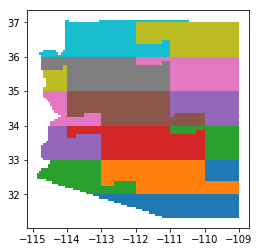

In [25]:
%matplotlib inline
gdf13.plot(column='USGSID')

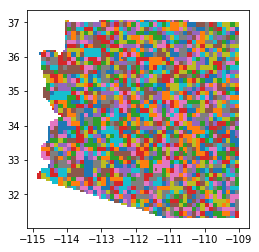

In [26]:
gdf13.plot(column='QQNAME')